# This is a notebook for module 4 - ML - Regalization, Ridge/Lasson Regression

### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

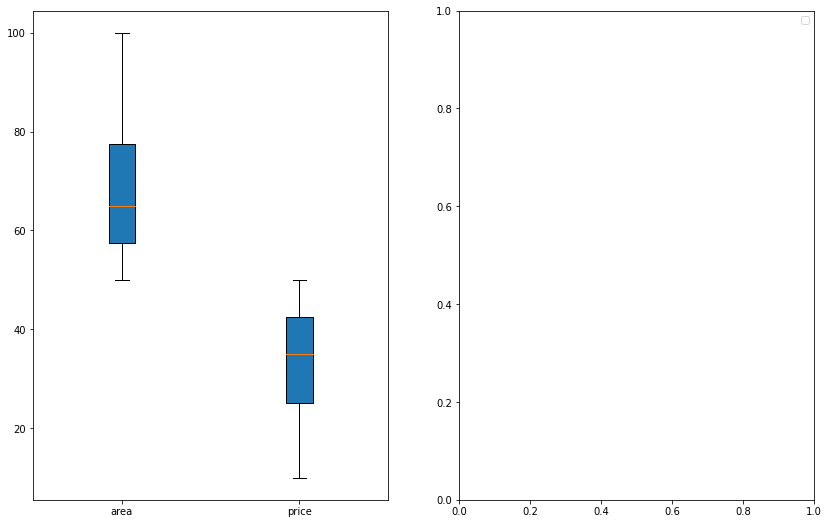

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))
box_plot1 = ax1.boxplot([df['area'], df['price']],
                        vert=True,
                        patch_artist=True,
                        labels=['area', 'price'])
plt.legend('Boxplot for feater Area and price')

In [7]:
df['area']

0     50
1     60
2     70
3    100
Name: area, dtype: int64

<AxesSubplot:>

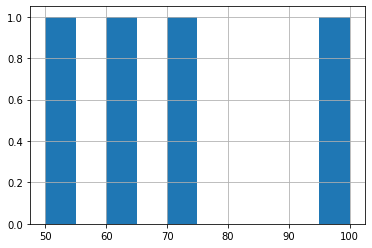

In [8]:
df['area'].hist()

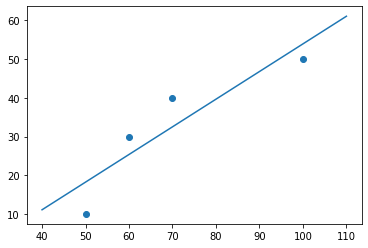

In [9]:
# visulation our features
plt.scatter(df['area'], df['price'])

margin = 10
X_min = X[:, 1].min()-margin
X_max = X[:, 1].max()+margin
X_support = np.linspace(X_min, X_max, num=100)

Y_model = w1 + w2 * X_support

plt.plot(X_support, Y_model)
plt.show()

In [10]:
x1, x0 = symbols('x1, x0')
yf = w1 * x0 + w2 * x1
yf

-17.5*x0 + 0.714285714285714*x1

In [11]:
from sklearn.datasets import load_boston
data_boston = load_boston()
features = data_boston.data
y = data_boston.target

In [13]:
features.shape

(506, 13)

In [14]:
y.shape

(506,)

In [15]:
def ndprint(a, format_string='{0:.2f}'):
    """Функция, которая распечатывает список в красивом виде"""
    return [format_string.format(v, i) for i, v in enumerate(a)]

In [16]:
from numpy.linalg import inv

# вычисляем к-ты линейной регрессии
w_analytic = inv(
    features.T.dot(features)
).dot(
    features.T
).dot(
    y
)
print(f"Аналитически определённые коэффициенты \n{ndprint(w_analytic)}")

Аналитически определённые коэффициенты 
['-0.09', '0.05', '-0.00', '2.85', '-2.87', '5.93', '-0.01', '-0.97', '0.17', '-0.01', '-0.39', '0.01', '-0.42']


In [17]:
from sklearn.linear_model import LinearRegression

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
print(f"Коэффициенты, вычисленные моделью sklearn \n {ndprint(reg.coef_)}")

Коэффициенты, вычисленные моделью sklearn 
 ['-0.11', '0.05', '0.02', '2.69', '-17.77', '3.81', '0.00', '-1.48', '0.31', '-0.01', '-0.95', '0.01', '-0.52']


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [57]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [58]:
data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()
X = generate_degrees(data['x_train'], degree=8)
y = data['y_train']

In [59]:
X.shape, y.shape

((50, 8), (50,))

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [61]:
x_train.shape, x_test.shape

((40, 8), (10, 8))

In [62]:
lasso = Lasso(alpha=0.8).fit(x_train, y_train)
ridge = Ridge(alpha=0.8).fit(x_train, y_train)

/home/stynic/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


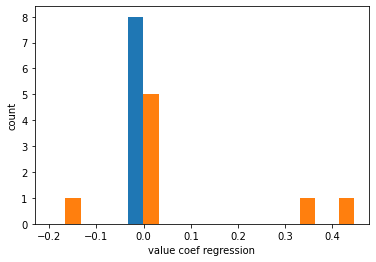

In [63]:
plt.hist((lasso.coef_, ridge.coef_), bins=8)
plt.xlabel('value coef regression')
plt.ylabel('count')
plt.show()

In [64]:
pre_y_train_lasso = lasso.predict(x_train)
pre_y_test_lasso = lasso.predict(x_test)

pre_y_train_ridge = ridge.predict(x_train)
pre_y_test_ridge = ridge.predict(x_test)

In [65]:
mse_train_lasso = mean_squared_error(y_train, pre_y_train_lasso)
mse_train_ridge = mean_squared_error(y_train, pre_y_train_ridge)

mse_test_lasso = mean_squared_error(y_test, pre_y_test_lasso)
mse_test_ridge = mean_squared_error(y_test, pre_y_test_ridge)

print(f'mse_train_lasso={mse_train_lasso}')
print(f'mse_train_ridge={mse_train_ridge}\n')

print(f'mse_test_lasso={mse_test_lasso}')
print(f'mse_test_ridge={mse_test_ridge}')

mse_train_lasso=0.15517204462175066
mse_train_ridge=0.07021038264651934

mse_test_lasso=0.09284713448746969
mse_test_ridge=0.07852416449022559
